### Please access data from our one-drive link mentioned in the mid-term report.
#### The datasets used in this notebook can be found under, "StocksData"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
crypto_info = ['BTC','ETH','USDT' , 'BNB' ,'SOL', 'USDC' ,'XRP' , 'STETH' ,'DOGE' ,'TRX']

In [3]:
data_list = [] 

for c in crypto_info:
    tdf = pd.read_csv(f'./StocksData/{c}_Stocks_Scrapped.csv')
    tdf.drop('Unnamed: 0', axis=1, inplace=True)
    tdf['Name'] = c
    data_list.append(tdf) 
data = pd.concat(data_list, ignore_index=True)

data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,"Nov 2, 2024","69,476.78","69,855.11","69,476.78","69,551.83","69,551.83","44,786,638,848",BTC
1,"Oct 31, 2024","72,335.05","72,662.31","69,590.50","70,215.19","70,215.19","40,627,912,076",BTC
2,"Oct 30, 2024","72,715.37","72,905.30","71,411.73","72,339.54","72,339.54","40,646,637,831",BTC
3,"Oct 29, 2024","69,910.05","73,577.21","69,729.91","72,720.49","72,720.49","58,541,874,402",BTC
4,"Oct 28, 2024","67,922.67","70,212.27","67,535.13","69,907.76","69,907.76","38,799,856,657",BTC


In [4]:
data[data['Name'] == 'USDT']

,Date,Open,High,Low,Close,Adj Close,Volume,Name
6249,"Nov 2, 2024",0.999528,1.000078,0.999407,0.999641,0.999641,"68,466,413,568",USDT
6250,"Oct 31, 2024",0.999596,1.000572,0.998211,0.998623,0.998623,"67,445,977,914",USDT
6251,"Oct 30, 2024",0.999712,1.000788,0.998488,0.999632,0.999632,"69,142,436,437",USDT
6252,"Oct 29, 2024",0.999333,1.00032,0.998754,0.999729,0.999729,"87,586,242,107",USDT
6253,"Oct 28, 2024",0.998694,1.000287,0.998287,0.999305,0.999305,"66,855,500,410",USDT
...,...,...,...,...,...,...,...,...
8794,"Nov 13, 2017",1.00448,1.02929,0.975103,1.00935,1.00935,"767,884,032",USDT
8795,"Nov 12, 2017",1.00602,1.10591,0.967601,1.01247,1.01247,"1,466,060,032",USDT
8796,"Nov 11, 2017",1.00598,1.02621,0.995799,1.00899,1.00899,"746,227,968",USDT
8797,"Nov 10, 2017",1.0065,1.02423,0.995486,1.00601,1.00601,"756,446,016",USDT


In [5]:
data['Name'].unique()

array(['BTC', 'ETH', 'USDT', 'BNB', 'SOL', 'USDC', 'XRP', 'STETH', 'DOGE',
       'TRX'], dtype=object)

In [6]:
data.shape

(24293, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24293 entries, 0 to 24292
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       24293 non-null  object
 1   Open       24293 non-null  object
 2   High       24293 non-null  object
 3   Low        24293 non-null  object
 4   Close      24293 non-null  object
 5   Adj Close  24293 non-null  object
 6   Volume     24293 non-null  object
 7   Name       24293 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [8]:
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close']
cryptos = ['BTC', 'ETH', 'STETH']

# Loop through each row in the data
for index, row in data.iterrows():
    if row['Name'] in cryptos:
        for column in columns_to_convert:
            data.at[index, column] = pd.to_numeric(row[column].replace(',', ''), errors='coerce')
    else:
        # Just convert to float for non-crypto rows
        for column in columns_to_convert:
            data.at[index, column] = pd.to_numeric(row[column], errors='coerce')

data['Volume'] = data['Volume'].str.replace(',', '')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24293 entries, 0 to 24292
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       24293 non-null  datetime64[ns]
 1   Open       24293 non-null  object        
 2   High       24293 non-null  object        
 3   Low        24293 non-null  object        
 4   Close      24293 non-null  object        
 5   Adj Close  24293 non-null  object        
 6   Volume     24293 non-null  int64         
 7   Name       24293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.5+ MB


In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2024-11-02,69476.78,69855.11,69476.78,69551.83,69551.83,44786638848,BTC
1,2024-10-31,72335.05,72662.31,69590.5,70215.19,70215.19,40627912076,BTC
2,2024-10-30,72715.37,72905.3,71411.73,72339.54,72339.54,40646637831,BTC
3,2024-10-29,69910.05,73577.21,69729.91,72720.49,72720.49,58541874402,BTC
4,2024-10-28,67922.67,70212.27,67535.13,69907.76,69907.76,38799856657,BTC


In [11]:
data.describe()

,Date,Volume
count,24293,2.429300e+04
mean,2021-04-27 14:21:13.552051968,1.591933e+10
min,2014-09-17 00:00:00,2.880000e+02
25%,2019-08-28 00:00:00,2.573176e+08
50%,2021-07-06 00:00:00,1.479467e+09
75%,2023-03-05 00:00:00,7.990439e+09
max,2024-11-02 00:00:00,8.325207e+13
std,NaN,7.318384e+11


In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Name         0
dtype: int64

In [13]:
data[data['Name'] == 'USDT']

,Date,Open,High,Low,Close,Adj Close,Volume,Name
6249,2024-11-02,0.999528,1.000078,0.999407,0.999641,0.999641,68466413568,USDT
6250,2024-10-31,0.999596,1.000572,0.998211,0.998623,0.998623,67445977914,USDT
6251,2024-10-30,0.999712,1.000788,0.998488,0.999632,0.999632,69142436437,USDT
6252,2024-10-29,0.999333,1.00032,0.998754,0.999729,0.999729,87586242107,USDT
6253,2024-10-28,0.998694,1.000287,0.998287,0.999305,0.999305,66855500410,USDT
...,...,...,...,...,...,...,...,...
8794,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032,USDT
8795,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032,USDT
8796,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968,USDT
8797,2017-11-10,1.0065,1.02423,0.995486,1.00601,1.00601,756446016,USDT


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

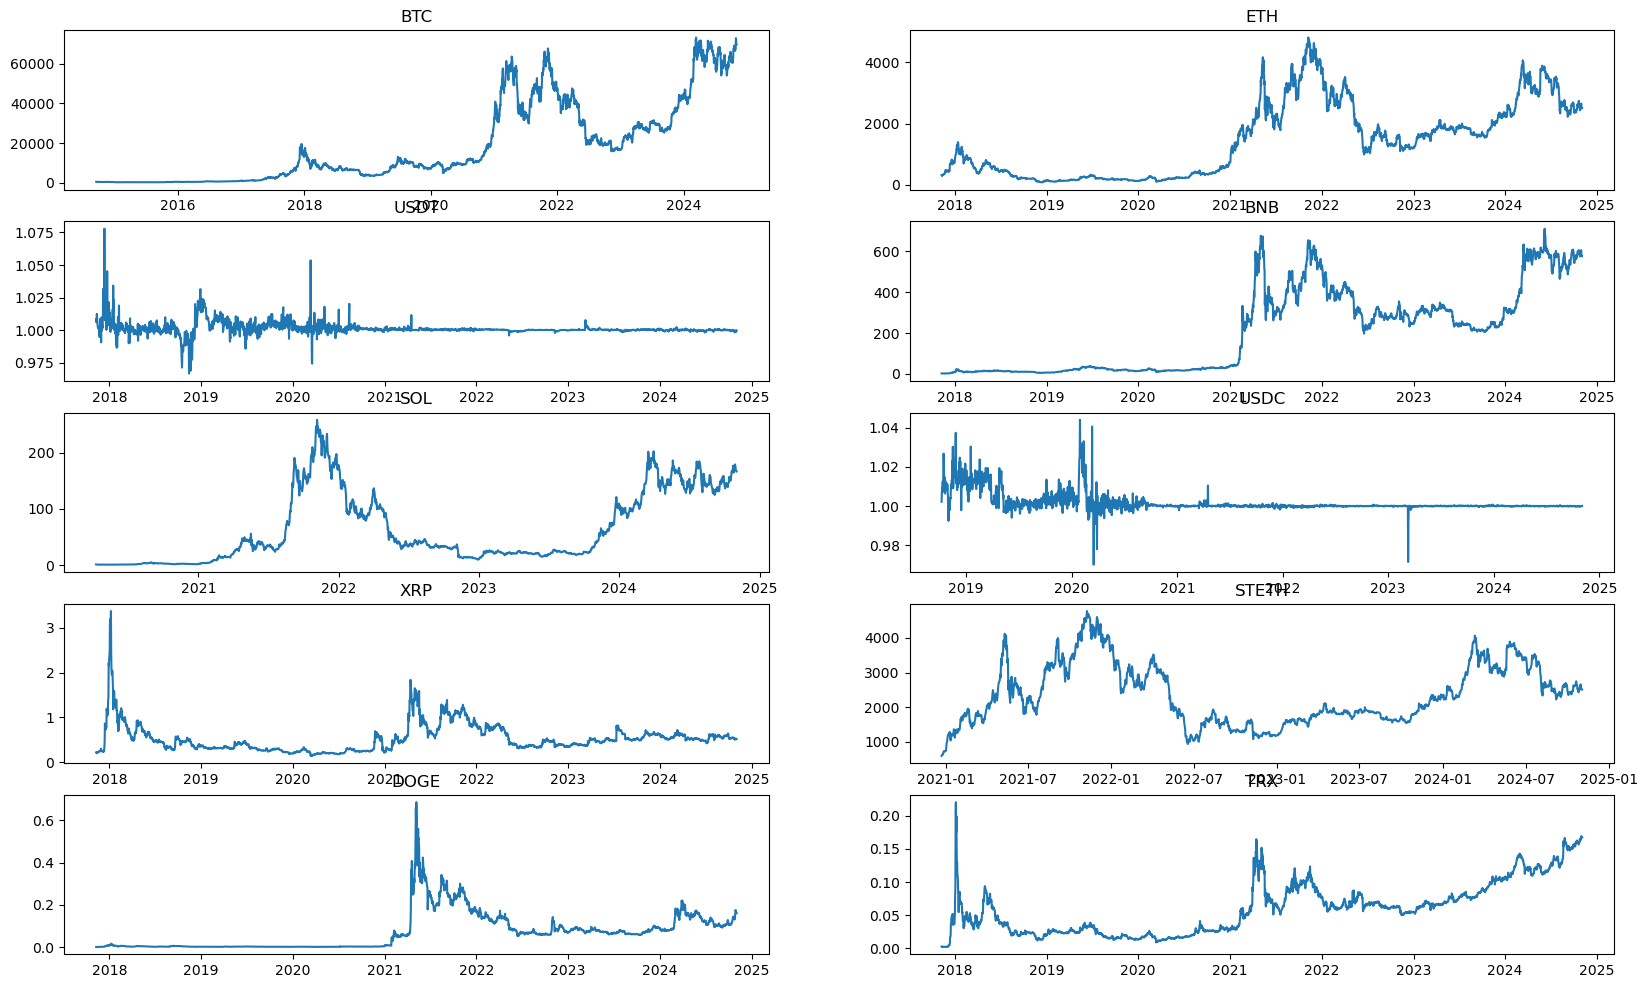

In [14]:
plt.figure(figsize=(20,12))
for i, company in enumerate(crypto_info, 1):
    plt.subplot(5, 2, i)
    df=data[data['Name']==company]
    plt.plot(df['Date'],df['Close'])
    plt.title(company)

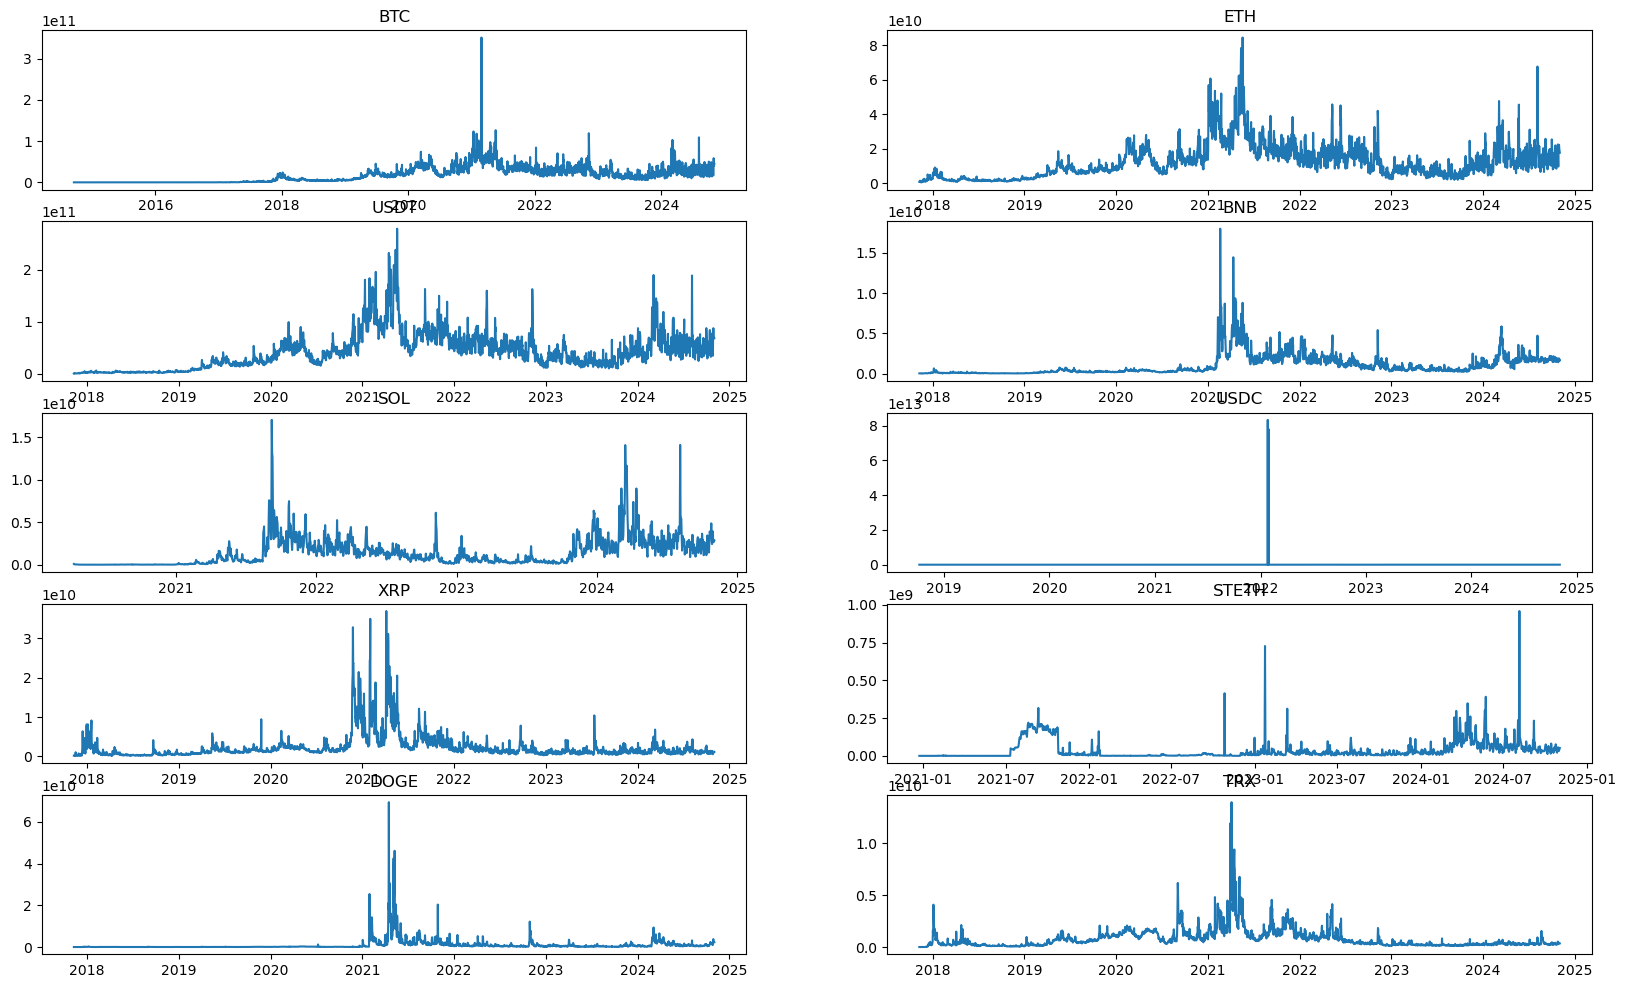

In [15]:
plt.figure(figsize=(20,12))
for i, company in enumerate(crypto_info,1):
    plt.subplot(5, 2, i)
    df=data[data['Name']==company]
    plt.plot(df['Date'],df['Volume'])
    plt.title(company)

In [16]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

'Moving Average - MA'

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

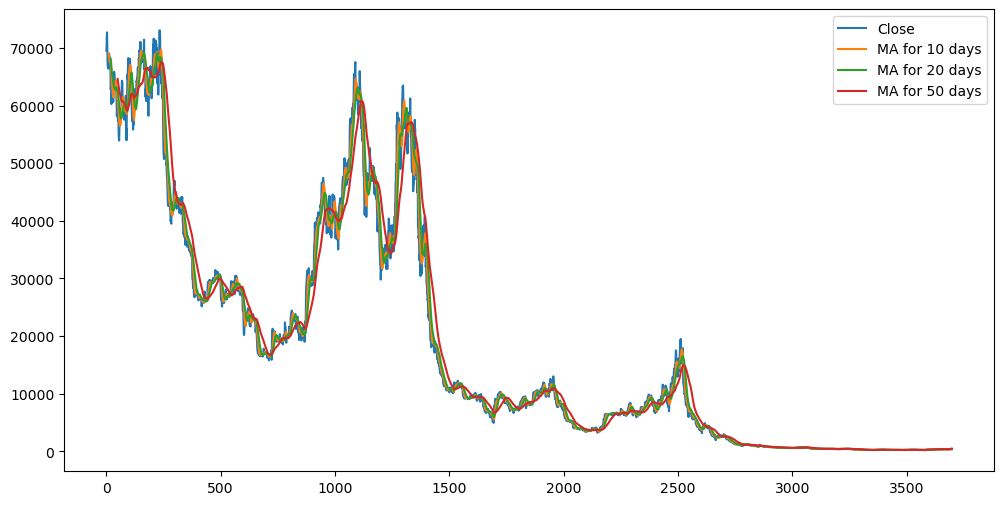

In [17]:
df=data[data['Name']=='BTC']
df[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

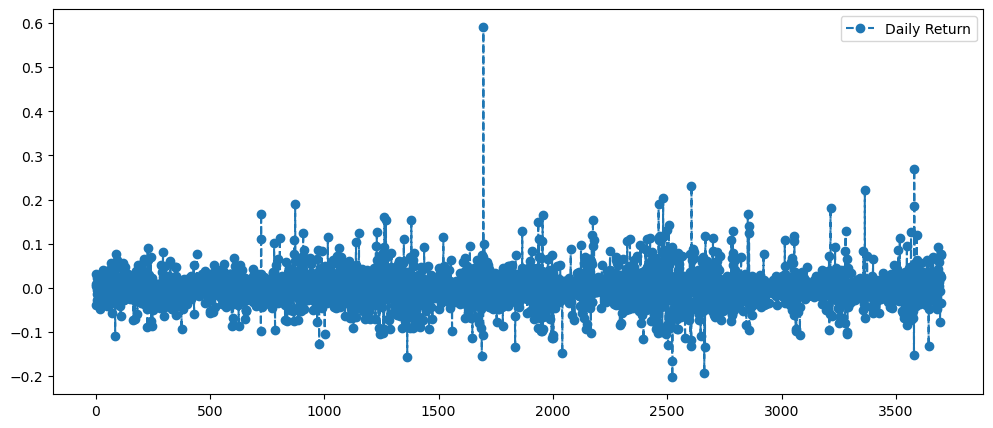

In [18]:
# use pct_change to find the percent change for each day
df['Daily Return'] = df['Close'].pct_change()
# plot the daily return percentage
df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

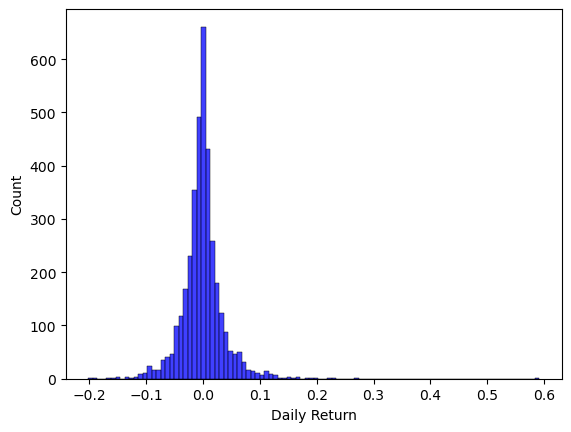

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(df['Daily Return'].dropna(),bins=100,color='blue')
plt.show()